In [1]:
# import librarys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the data 

data = pd.read_csv('C:\\Users\\DELL\\Kaggle\\Challenges\\house-prices\\data\\train.csv')


In [3]:
# overview of the challenge

# from 79 features, predict the final price of a residence.
# target: SalePrice
# SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.


In [4]:
# plan

# 1. EDA
# 2. Data Cleaning
# 3. Feature Engineering
# 4. Model testing
# 5. Predictions and submissiun

In [5]:
# taking a look at the data as a whole.

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# we have 1460 rows and 81 columns

data.shape

(1460, 81)

In [7]:
# we have 43 categorical features and 36 numerical

data.drop(columns=['Id','SalePrice']).dtypes.sort_values()

MSSubClass        int64
GrLivArea         int64
Fireplaces        int64
TotRmsAbvGrd      int64
BsmtFinSF1        int64
                  ...  
BsmtFinType2     object
Heating          object
SaleType         object
RoofMatl         object
SaleCondition    object
Length: 79, dtype: object

In [8]:
pd.options.display.max_rows = 82

In [9]:
# lets check for nulls

data.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
LotConfig           0
OverallCond         0
OverallQual         0
HouseStyle          0
BldgType            0
Condition2          0
BsmtFinSF1          0
MSZoning            0
LotArea             0
Street              0
Condition1          0
Neighborhood        0
LotShape            0
LandContour         0
LandSlope           0
SalePrice 

In [10]:
# this is the descriptive stats of the numerical data, not very ink to eye right?

data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [11]:
# and this is the descriptive stats of the target

# mean house price: 180,900
# standard deviation: 80,000
# min house price: 34,900
# max house price: 755,000

data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <BarContainer object of 10 artists>)

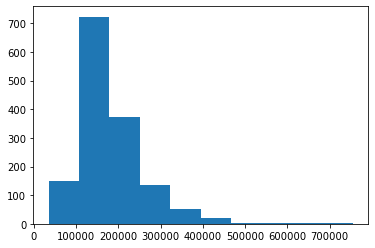

In [12]:
# the freq distribuition of the houses prices shows that most of them are between 100,000 and 200,000

target = data['SalePrice']

plt.hist(target)

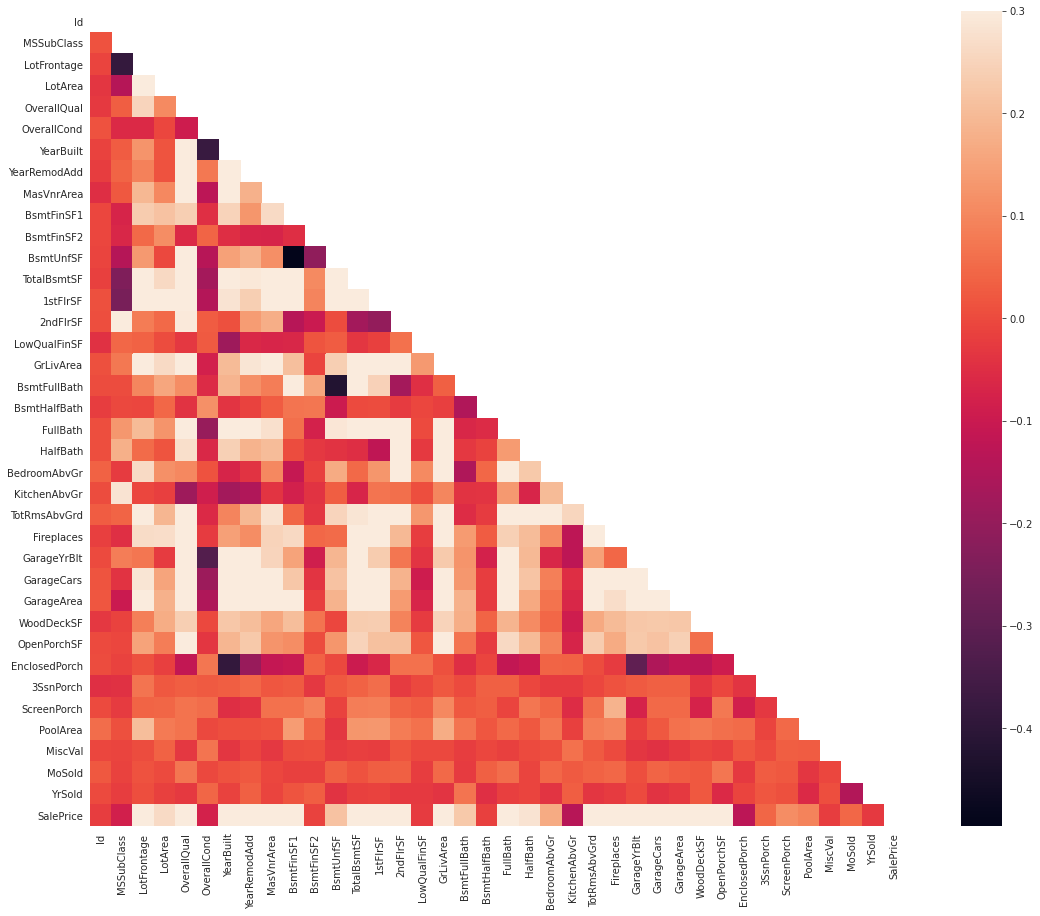

In [13]:
# correlation matrix between the variables

corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 15))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)

In [14]:
data.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [15]:
# Biggest correlations:

# OverallQual      0.79 - Overall material and finish quality
# GrLivArea        0.71 - Above grade (ground) living area square feet
# GarageCars       0.64 - Size of garage in car capacity
# GarageArea       0.62 - Size of garage in square feet
# TotalBsmtSF      0.61 - Total square feet of basement area
# 1stFlrSF         0.60 - First Floor square feet
# FullBath         0.56 - Full bathrooms above grade
# TotRmsAbvGrd     0.53 - Total rooms above grade (does not include bathrooms)
# YearBuilt        0.52 - Original construction date
# YearRemodAdd     0.51 - Remodel date
# GarageYrBlt      0.48 - Year garage was built
# MasVnrArea       0.47 - Masonry veneer type
# Fireplaces       0.46 - Number of fireplaces

# lets analyse this correlations


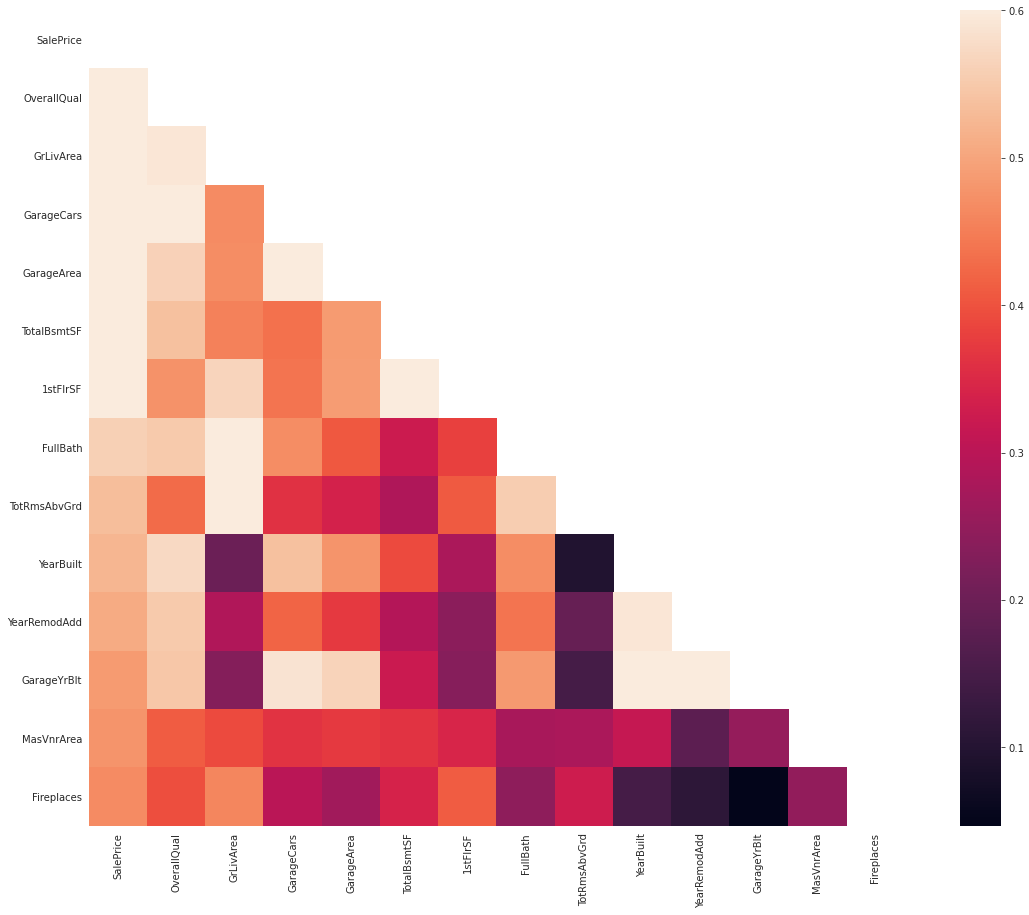

In [16]:
# this is a heatmap of the most correlated to the target features

corr = data[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 
      'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
      'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces']].corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 15))
    ax = sns.heatmap(corr, mask=mask, vmax=.6, square=True)

In [17]:
# OverallQual - has high correlation to pretty much every other interesting feature, besides Fireplaces, MasVnrArea, TotRmsAbvGrd
# GrLivArea - has high correlation to TotRmsAbvGrd, FullBath, 1stFlrSF
# GarageCars - has high correlation to GarageYrBlt, YearBuilt and GarageArea.
# GarageArea - has high correlation to GarageYrBuilt, YearBuilt
# TotalBsmtSF - Has high correlation only to 1stFlrSF - GOOD
# 1stFlSF - has high correlation to GrLiveArea, GarageArea and TotalBsmArea
# FullBath - has high correlation with TotalRmsAbvGrade, GrLivArea, GarageYrBlt
# TotRmsAbvGrd - has high correlation with GrLivArea

# features to take - OverallQual, TotRmsAbvGrd, MasVnrArea, Fireplaces, BsmFullbath, LotArea, WoodDeckSF

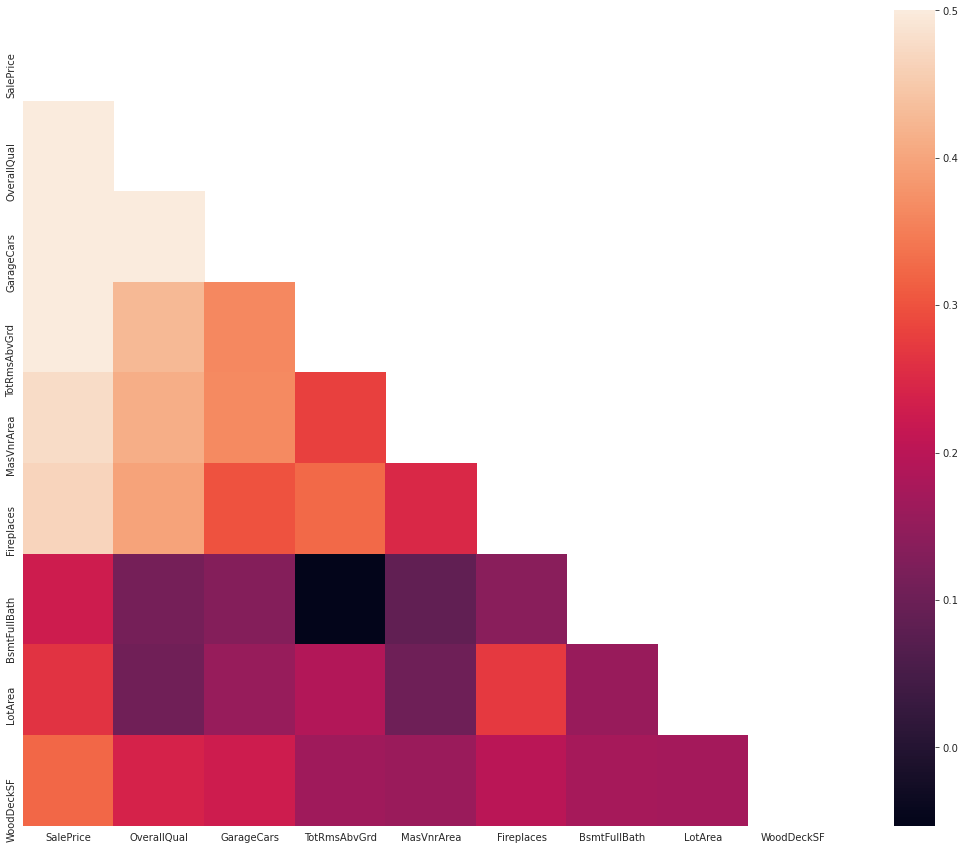

In [18]:
# lets get more features, that are less correlated but still are able to give information

corr = data[['SalePrice', 'OverallQual', 'GarageCars','TotRmsAbvGrd','MasVnrArea', 'Fireplaces', 'BsmtFullBath', 'LotArea' ,'WoodDeckSF']].corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 15))
    ax = sns.heatmap(corr, mask=mask, vmax=.5, square=True)

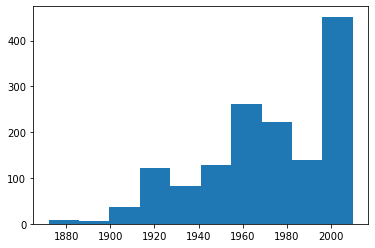

In [19]:
plt.hist(data['YearBuilt'])
plt.show()


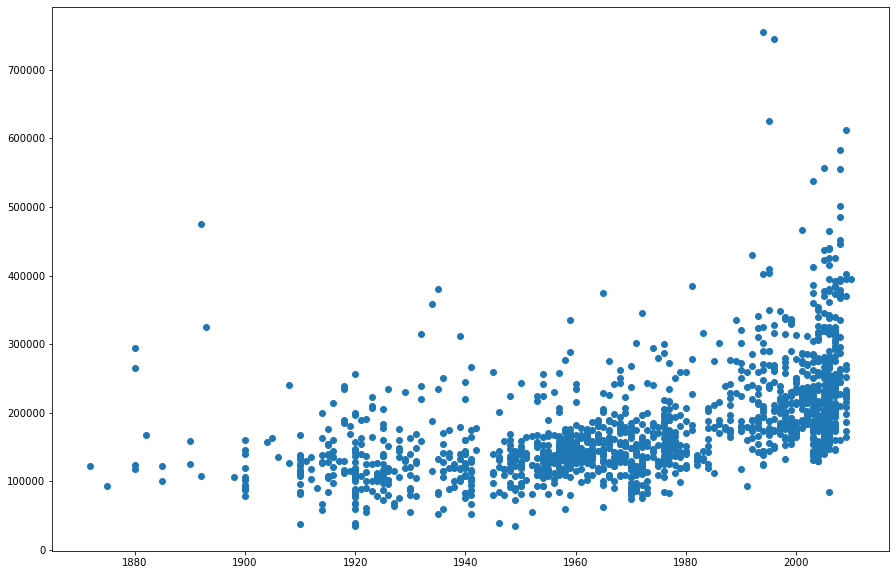

In [20]:
# although we can see a pattern here, this feature is highly correlated to many others, making model have high multicolinirarity

plt.figure(figsize=(15, 10))

plt.scatter(data['YearBuilt'],data['SalePrice'])

plt.show()

In [21]:
# so this is the features that we pre-selected for the numerical part

corr

,SalePrice,OverallQual,GarageCars,TotRmsAbvGrd,MasVnrArea,Fireplaces,BsmtFullBath,LotArea,WoodDeckSF
SalePrice,1.000000,0.790982,0.640409,0.533723,0.477493,0.466929,0.227122,0.263843,0.324413
OverallQual,0.790982,1.000000,0.600671,0.427452,0.411876,0.396765,0.111098,0.105806,0.238923
GarageCars,0.640409,0.600671,1.000000,0.362289,0.364204,0.300789,0.131881,0.154871,0.226342
TotRmsAbvGrd,0.533723,0.427452,0.362289,1.000000,0.280682,0.326114,-0.053275,0.190015,0.165984
MasVnrArea,0.477493,0.411876,0.364204,0.280682,1.000000,0.249070,0.085310,0.104160,0.159718
Fireplaces,0.466929,0.396765,0.300789,0.326114,0.249070,1.000000,0.137928,0.271364,0.200019
BsmtFullBath,0.227122,0.111098,0.131881,-0.053275,0.085310,0.137928,1.000000,0.158155,0.175315
LotArea,0.263843,0.105806,0.154871,0.190015,0.104160,0.271364,0.158155,1.000000,0.171698
WoodDeckSF,0.324413,0.238923,0.226342,0.165984,0.159718,0.200019,0.175315,0.171698,1.000000


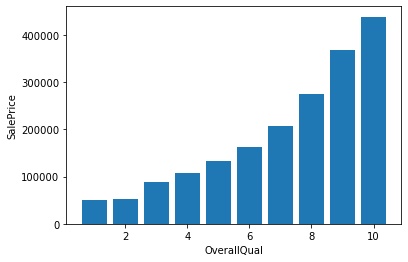

In [22]:
# now lets look on how they related to our target

# the OverallQual is the most correlated and its follows pretty mutch a good logic, higher the overall higher the price.

x1 = data.groupby('OverallQual').agg({'SalePrice':'mean'}).reset_index()

plt.bar(x1['OverallQual'], x1['SalePrice'])
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")
plt.show()

In [23]:
data['GarageCars'].value_counts()

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

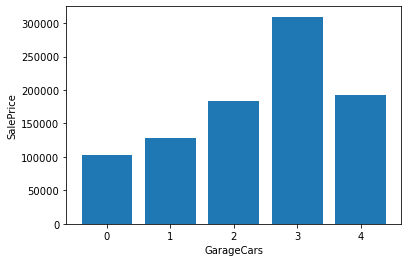

In [24]:
# the GarageCars however doest not follow a so standard way, it changes drastically from 2 to 3 then it reduces
# we may think of transforming this to a dummy categorical
# think of grouping

x1 = data.groupby('GarageCars').agg({'SalePrice':'mean'}).reset_index()

plt.bar(x1['GarageCars'], x1['SalePrice'])
plt.xlabel("GarageCars")
plt.ylabel("SalePrice")
plt.show()

In [25]:
data['TotRmsAbvGrd'].value_counts()

6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
14      1
2       1
Name: TotRmsAbvGrd, dtype: int64

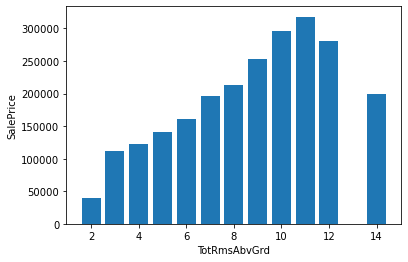

In [26]:
# this also has a pretty normal growth, besides the lump after 12
# whoever, given that the is only 1 house with 14 i dont think we should change the way to deal with it

x1 = data.groupby('TotRmsAbvGrd').agg({'SalePrice':'mean'}).reset_index()

plt.bar(x1['TotRmsAbvGrd'], x1['SalePrice'])
plt.xlabel("TotRmsAbvGrd")
plt.ylabel("SalePrice")
plt.show()

In [27]:
data['MasVnrArea'].value_counts()

0.0      861
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
651.0      1
337.0      1
415.0      1
293.0      1
621.0      1
Name: MasVnrArea, Length: 327, dtype: int64

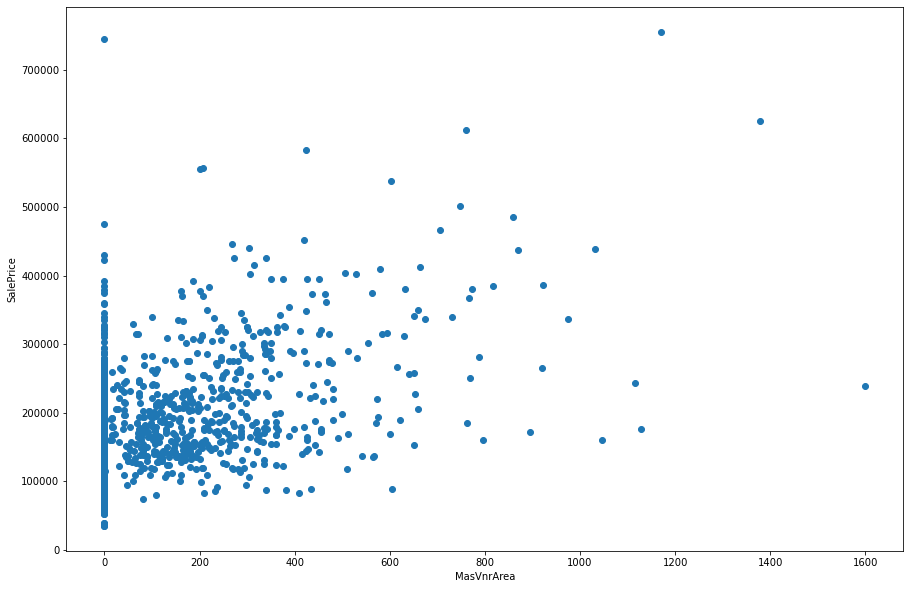

In [28]:
# looking at this graph we cant really tell if the price raises if the veneer area its bigger
# however it does have some geometrical shape, and we can test if it works

plt.figure(figsize=(15, 10))

plt.scatter(data['MasVnrArea'], data['SalePrice'])
plt.xlabel("MasVnrArea")
plt.ylabel("SalePrice")
plt.show()

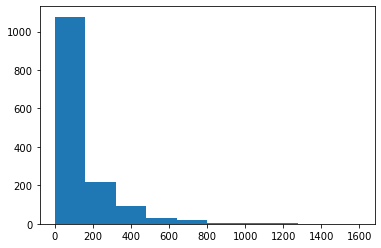

In [29]:
# this however has high kurtosis, so one think we can do is bining.

plt.hist(data['MasVnrArea'])
plt.show()

In [32]:
data['Fireplaces'].value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

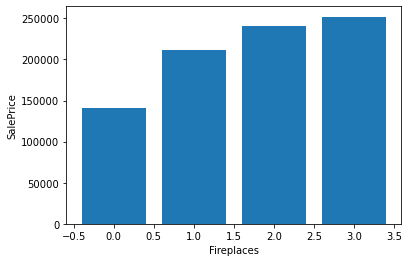

In [33]:
# here the fireplaces growth makes sense, so we probably keep it the way it is
# grouping or leaving as it is

x1 = data.groupby('Fireplaces').agg({'SalePrice':'mean'}).reset_index()

plt.bar(x1['Fireplaces'], x1['SalePrice'])
plt.xlabel("Fireplaces")
plt.ylabel("SalePrice")
plt.show()

In [34]:
data['BsmtFullBath'].value_counts()


0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64

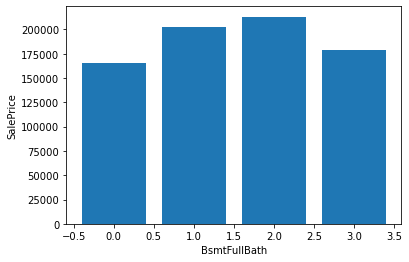

In [35]:
# the data here seems almost as if it is random
# we should probably drop this column

x1 = data.groupby('BsmtFullBath').agg({'SalePrice':'mean'}).reset_index()

plt.bar(x1['BsmtFullBath'], x1['SalePrice'])
plt.xlabel("BsmtFullBath")
plt.ylabel("SalePrice")
plt.show()

In [36]:
data['LotArea'].value_counts()


7200     25
9600     24
6000     17
10800    14
9000     14
         ..
7094      1
6130      1
9337      1
5232      1
8190      1
Name: LotArea, Length: 1073, dtype: int64

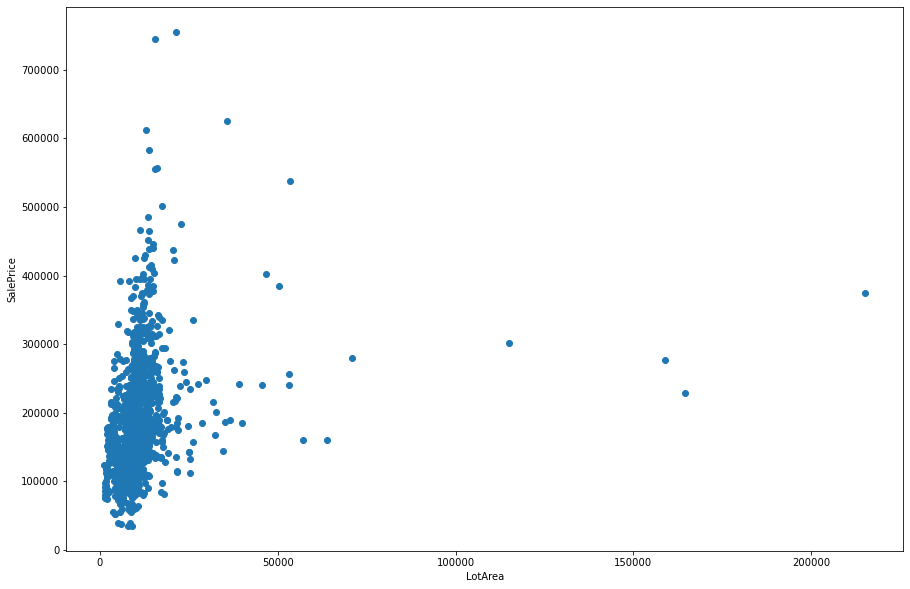

In [37]:
# the data here seems to be really clustered and its not giving us too much to work with
# we should probably not use this column

plt.figure(figsize=(15, 10))

plt.scatter(data['LotArea'], data['SalePrice'])
plt.xlabel("LotArea")
plt.ylabel("SalePrice")

plt.show()

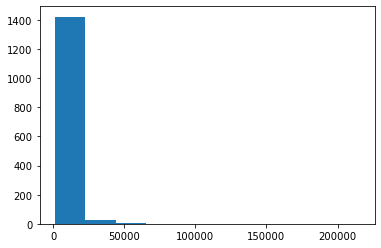

In [38]:
plt.hist(data['LotArea'])
plt.show()

In [39]:
data['WoodDeckSF'].value_counts()

0      761
192     38
100     36
144     33
120     31
      ... 
269      1
265      1
263      1
260      1
215      1
Name: WoodDeckSF, Length: 274, dtype: int64

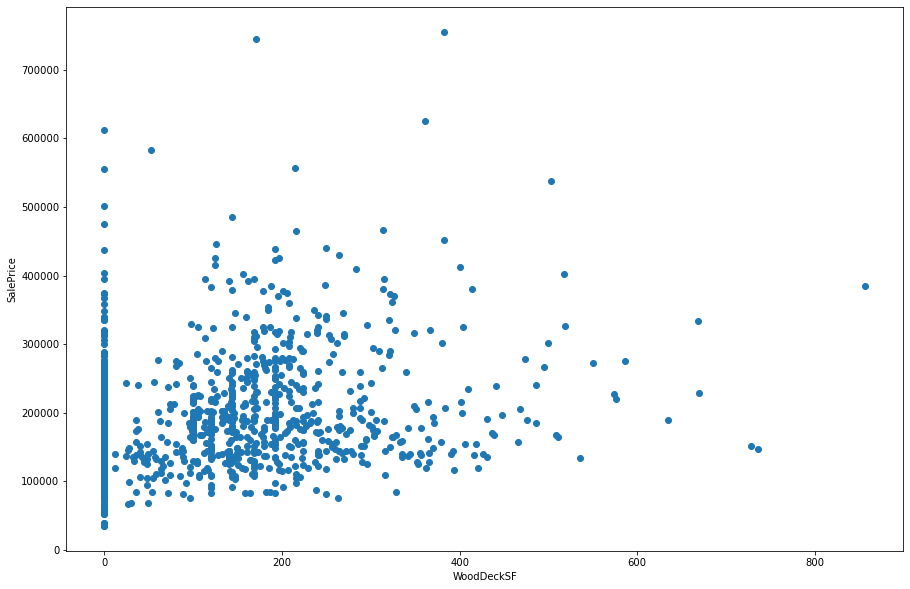

In [40]:
# now, besides the extreme amount of houses with no woodecks, it seems we can use this

plt.figure(figsize=(15, 10))

plt.scatter(data['WoodDeckSF'], data['SalePrice'])
plt.xlabel('WoodDeckSF')
plt.ylabel("SalePrice")

plt.show()

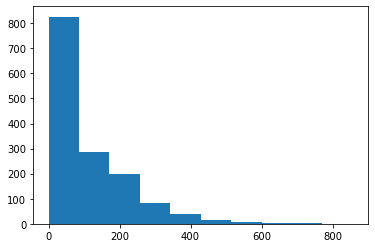

In [41]:
# this aswell has high kurtosis, so we may aswell bin it.

plt.hist(data['WoodDeckSF'])
plt.show()

In [42]:
# Woodeck, LotArea - Review
# Fireplaces, Garage, Woodeck - Group
# BsmtFullBath, MasVnrArea - Drop

In [43]:
# If you were to deduce a price of a house without knowing anything about it what would you do?
# The logical thing is to see the prices of its neighbors

n_data = data.groupby(['Neighborhood']).agg({'SalePrice':'mean'}).reset_index()



In [44]:
n_data.rename(columns={'SalePrice':'NSalePrice'}, inplace=True)

In [45]:
data = pd.merge(data, 
                      n_data, 
                      on ='Neighborhood', 
                      how ='inner')

In [46]:
# this are the functions used to group and turn into boolean the features: fireplaces, wooddeck, bsmtfullbath and yearbuilt


def fireplaces(row):
    if row == 0:
        return 0
    else:
        return 1

def woodeck(row):
    if row == 0:
        return 0
    else:
        return 1
    
def bsmtfullbath(row):
    if row == 0:
        return 0
    else:
        return 1

In [47]:
data['Fireplaces?'] = data['Fireplaces'].apply(fireplaces)

In [48]:
data['WoodDeck?'] = data['WoodDeckSF'].apply(woodeck)

In [49]:
data['BsmtFullBath?'] = data['BsmtFullBath'].apply(bsmtfullbath)

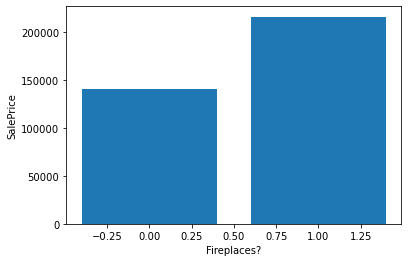

In [50]:
# the results of the masking

x1 = data.groupby('Fireplaces?').agg({'SalePrice':'mean'}).reset_index()

plt.bar(x1['Fireplaces?'], x1['SalePrice'])
plt.xlabel("Fireplaces?")
plt.ylabel("SalePrice")
plt.show()

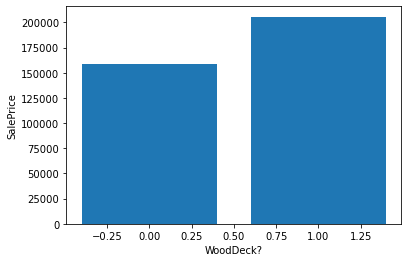

In [51]:
x1 = data.groupby('WoodDeck?').agg({'SalePrice':'mean'}).reset_index()

plt.bar(x1['WoodDeck?'], x1['SalePrice'])
plt.xlabel("WoodDeck?")
plt.ylabel("SalePrice")
plt.show()

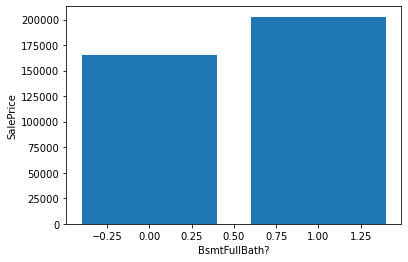

In [52]:
x1 = data.groupby('BsmtFullBath?').agg({'SalePrice':'mean'}).reset_index()

plt.bar(x1['BsmtFullBath?'], x1['SalePrice'])
plt.xlabel("BsmtFullBath?")
plt.ylabel("SalePrice")
plt.show()

In [53]:
data['VnrArea/SF'] = data['MasVnrArea']/(data['1stFlrSF']+data['2ndFlrSF'])

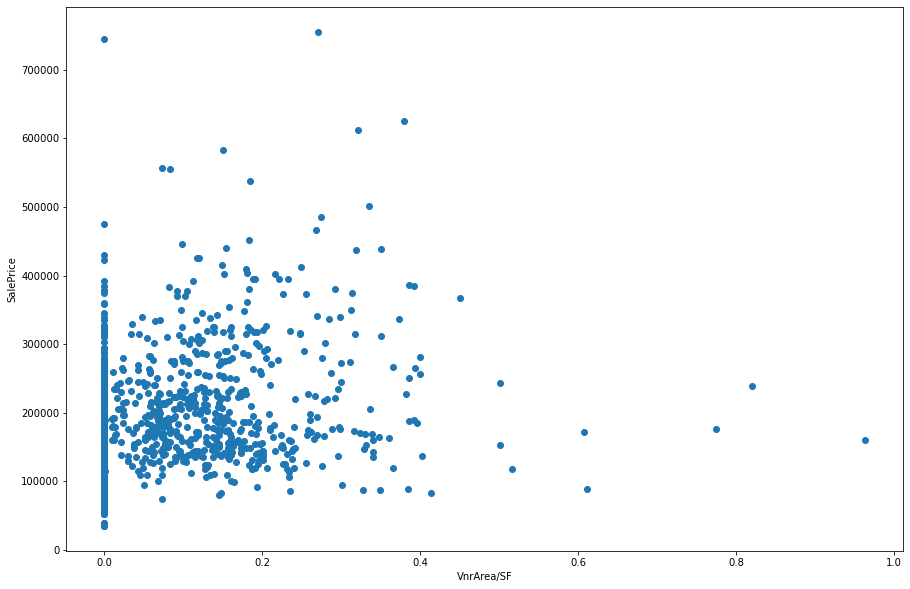

In [54]:
plt.figure(figsize=(15, 10))

plt.scatter(data['VnrArea/SF'], data['SalePrice'])
plt.xlabel('VnrArea/SF')
plt.ylabel("SalePrice")

plt.show()

In [55]:
# the privous correlation matrix

corr

,SalePrice,OverallQual,GarageCars,TotRmsAbvGrd,MasVnrArea,Fireplaces,BsmtFullBath,LotArea,WoodDeckSF
SalePrice,1.000000,0.790982,0.640409,0.533723,0.477493,0.466929,0.227122,0.263843,0.324413
OverallQual,0.790982,1.000000,0.600671,0.427452,0.411876,0.396765,0.111098,0.105806,0.238923
GarageCars,0.640409,0.600671,1.000000,0.362289,0.364204,0.300789,0.131881,0.154871,0.226342
TotRmsAbvGrd,0.533723,0.427452,0.362289,1.000000,0.280682,0.326114,-0.053275,0.190015,0.165984
MasVnrArea,0.477493,0.411876,0.364204,0.280682,1.000000,0.249070,0.085310,0.104160,0.159718
Fireplaces,0.466929,0.396765,0.300789,0.326114,0.249070,1.000000,0.137928,0.271364,0.200019
BsmtFullBath,0.227122,0.111098,0.131881,-0.053275,0.085310,0.137928,1.000000,0.158155,0.175315
LotArea,0.263843,0.105806,0.154871,0.190015,0.104160,0.271364,0.158155,1.000000,0.171698
WoodDeckSF,0.324413,0.238923,0.226342,0.165984,0.159718,0.200019,0.175315,0.171698,1.000000


In [56]:
# and the new one after the feature engineering

data[['SalePrice', 'OverallQual', 'GarageCars','TotRmsAbvGrd', 'Fireplaces?', 'BsmtFullBath?','WoodDeck?','NSalePrice']].corr()

,SalePrice,OverallQual,GarageCars,TotRmsAbvGrd,Fireplaces?,BsmtFullBath?,WoodDeck?,NSalePrice
SalePrice,1.000000,0.790982,0.640409,0.533723,0.471908,0.230846,0.297662,0.738630
OverallQual,0.790982,1.000000,0.600671,0.427452,0.438143,0.118715,0.274294,0.685360
GarageCars,0.640409,0.600671,1.000000,0.362289,0.349501,0.142707,0.240026,0.567601
TotRmsAbvGrd,0.533723,0.427452,0.362289,1.000000,0.330382,-0.057138,0.146028,0.308953
Fireplaces?,0.471908,0.438143,0.349501,0.330382,1.000000,0.084829,0.206934,0.371414
BsmtFullBath?,0.230846,0.118715,0.142707,-0.057138,0.084829,1.000000,0.147063,0.165558
WoodDeck?,0.297662,0.274294,0.240026,0.146028,0.206934,0.147063,1.000000,0.254100
NSalePrice,0.738630,0.685360,0.567601,0.308953,0.371414,0.165558,0.254100,1.000000


In [57]:
# and we have the numerical features done

numericalfeat = data[['Id','SalePrice', 'OverallQual', 'GarageCars','TotRmsAbvGrd', 'Fireplaces?', 'BsmtFullBath?','WoodDeck?','NSalePrice']]

In [58]:
numericalfeat.head()

,Id,SalePrice,OverallQual,GarageCars,TotRmsAbvGrd,Fireplaces?,BsmtFullBath?,WoodDeck?,NSalePrice
0,1,208500,7,2,8,0,1,0,197965.773333
1,3,223500,7,2,6,1,1,0,197965.773333
2,14,279500,7,3,7,1,0,1,197965.773333
3,23,230000,8,2,7,1,0,1,197965.773333
4,33,179900,8,2,7,0,0,0,197965.773333


In [59]:
numericalfeat.to_csv('numericalfeat.csv')

In [60]:
numericalfeat.isnull().sum()

Id               0
SalePrice        0
OverallQual      0
GarageCars       0
TotRmsAbvGrd     0
Fireplaces?      0
BsmtFullBath?    0
WoodDeck?        0
NSalePrice       0
dtype: int64

In [61]:
# categorical features

categoricalfeat = data[['Id','Neighborhood', 'HouseStyle', 'MasVnrType', 'Foundation', 'KitchenQual', 'Functional', 'SaleCondition']]

In [62]:
# we are going to group by finished/unfinished and the split ones
# because the data is not very balanced

def housestyle(row):
    if row in ['1.5Unf','2.5Unf']:
        return 'Unfinished'
    elif row in ['1Story','1.5Fin','2Story','2.5Fin']:
        return 'Finished'
    else:
        return 'Split'


In [63]:
categoricalfeat['HouseStyle'] = categoricalfeat['HouseStyle'].apply(housestyle)

<ipython-input-63-21246adf20f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categoricalfeat['HouseStyle'] = categoricalfeat['HouseStyle'].apply(housestyle)


In [64]:
categoricalfeat.head()

,Id,Neighborhood,HouseStyle,MasVnrType,Foundation,KitchenQual,Functional,SaleCondition
0,1,CollgCr,Finished,BrkFace,PConc,Gd,Typ,Normal
1,3,CollgCr,Finished,BrkFace,PConc,Gd,Typ,Normal
2,14,CollgCr,Finished,Stone,PConc,Gd,Typ,Partial
3,23,CollgCr,Finished,BrkFace,PConc,Gd,Typ,Normal
4,33,CollgCr,Finished,None,PConc,Gd,Typ,Normal


In [65]:
# we are going to one-hot-encode the categorical features so our algorithm can understand them

categoricalfeat_dummies = pd.get_dummies(data=categoricalfeat, columns=['Neighborhood', 'HouseStyle', 'MasVnrType', 'Foundation', 'KitchenQual', 'Functional', 'SaleCondition'])

In [66]:
categoricalfeat_dummies.columns

Index(['Id', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'HouseStyle_Finished',
       'HouseStyle_Split', 'HouseStyle_Unfinished', 'MasVnrType_BrkCmn',
       'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone',
       'Foundation_BrkTil', 'Foundation_CBlock', 'Foundation_PConc',
       'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood',
       'KitchenQual_Ex', 'KitchenQual_Fa',

In [67]:
data_eng = pd.merge(left=numericalfeat, right=categoricalfeat_dummies, on='Id')

In [68]:
data_eng

,Id,SalePrice,OverallQual,GarageCars,TotRmsAbvGrd,Fireplaces?,BsmtFullBath?,WoodDeck?,NSalePrice,Neighborhood_Blmngtn,...,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,208500,7,2,8,0,1,0,197965.773333,0,...,0,0,0,1,0,0,0,0,1,0
1,3,223500,7,2,6,1,1,0,197965.773333,0,...,0,0,0,1,0,0,0,0,1,0
2,14,279500,7,3,7,1,0,1,197965.773333,0,...,0,0,0,1,0,0,0,0,0,1
3,23,230000,8,2,7,1,0,1,197965.773333,0,...,0,0,0,1,0,0,0,0,1,0
4,33,179900,8,2,7,0,0,0,197965.773333,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1361,189000,5,2,8,0,0,1,142591.360000,0,...,0,0,0,1,0,0,0,0,1,0
1456,1377,91000,6,1,4,0,0,0,142591.360000,0,...,0,0,0,1,0,0,0,0,1,0
1457,1400,137450,6,1,7,1,0,1,142591.360000,0,...,0,0,0,1,0,0,0,0,1,0
1458,600,151000,6,2,6,1,1,1,137500.000000,0,...,0,0,0,1,0,0,0,0,1,0


In [69]:
from sklearn.preprocessing import StandardScaler

X = data_eng.drop(columns=['Id','SalePrice'])
y = data_eng['SalePrice']

# create object

scaler = StandardScaler()

# fit

scaler.fit(X)

# transform 

X_scaled = scaler.transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

X_scaled.head()

,OverallQual,GarageCars,TotRmsAbvGrd,Fireplaces?,BsmtFullBath?,WoodDeck?,NSalePrice,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,...,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.651479,0.311725,0.912210,-1.056382,1.190470,-0.958399,0.290573,-0.10854,-0.037037,-0.105263,...,-0.154412,-0.101885,-0.02618,0.271163,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1,0.651479,0.311725,-0.318683,0.946628,1.190470,-0.958399,0.290573,-0.10854,-0.037037,-0.105263,...,-0.154412,-0.101885,-0.02618,0.271163,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
2,0.651479,1.650307,0.296763,0.946628,-0.840004,1.043407,0.290573,-0.10854,-0.037037,-0.105263,...,-0.154412,-0.101885,-0.02618,0.271163,-0.272616,-0.052414,-0.091035,-0.117851,-2.138345,3.268027
3,1.374795,0.311725,0.296763,0.946628,-0.840004,1.043407,0.290573,-0.10854,-0.037037,-0.105263,...,-0.154412,-0.101885,-0.02618,0.271163,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
4,1.374795,0.311725,0.296763,-1.056382,-0.840004,-0.958399,0.290573,-0.10854,-0.037037,-0.105263,...,-0.154412,-0.101885,-0.02618,0.271163,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995


In [70]:
from sklearn.decomposition import PCA

# create the PCA object
# the number of components chosen will be the new number of features!

pca = PCA(n_components = 10, random_state=0)

# fit the PCA model to breast cancer data

pca.fit(X_scaled)

# it's like we have three new axis (those defined by the PCA principal components)

X_pca = pca.transform(X_scaled)


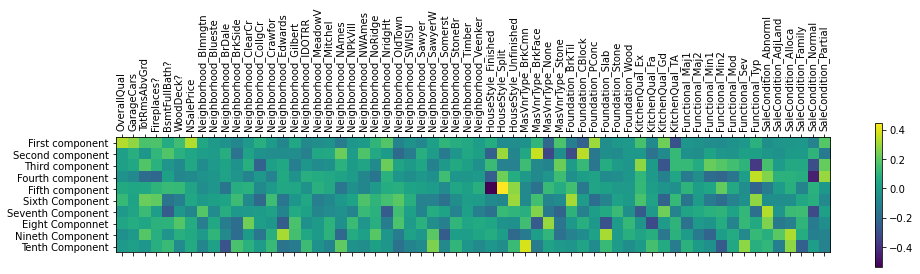

In [71]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1, 2,3,4,5,6,7,8,9], ["First component", "Second component","Third component","Fourth component","Fifth component",
                                     "Sixth Component","Seventh Component","Eight Componnet","Nineth Component","Tenth Component"])
plt.colorbar()
plt.xticks(range(len(X.columns)), X.columns, rotation=90)
plt.show()

In [72]:
X_pca = pd.DataFrame(X_pca, columns=["First component", "Second component","Third component","Fourth component","Fifth component",
                                     "Sixth Component","Seventh Component","Eight Componnet","Nineth Component","Tenth Component"])
X_pca.head()

,First component,Second component,Third component,Fourth component,Fifth component,Sixth Component,Seventh Component,Eight Componnet,Nineth Component,Tenth Component
0,2.071991,0.314537,-1.868667,-0.571725,-0.859369,-0.833817,0.509956,-0.842649,-0.772932,0.010666
1,2.214315,0.563714,-1.907311,-0.745516,-0.713178,-0.694120,0.368897,-0.706582,-0.832913,0.190905
2,4.134209,-1.176751,0.687578,1.718314,-0.308619,-1.429241,0.516983,-0.221207,-1.193098,-0.297974
3,2.710142,0.382672,-1.861112,-1.081680,-0.653189,-0.368239,0.928352,-0.486877,-0.537082,-0.204164
4,1.419520,-1.473799,-1.946206,-0.423750,-0.494531,-1.067945,0.085830,0.106237,-0.673601,0.077880


In [73]:
final_X = pd.concat([y,X_pca],axis=1)

In [74]:
final_X.head()

,SalePrice,First component,Second component,Third component,Fourth component,Fifth component,Sixth Component,Seventh Component,Eight Componnet,Nineth Component,Tenth Component
0,208500,2.071991,0.314537,-1.868667,-0.571725,-0.859369,-0.833817,0.509956,-0.842649,-0.772932,0.010666
1,223500,2.214315,0.563714,-1.907311,-0.745516,-0.713178,-0.694120,0.368897,-0.706582,-0.832913,0.190905
2,279500,4.134209,-1.176751,0.687578,1.718314,-0.308619,-1.429241,0.516983,-0.221207,-1.193098,-0.297974
3,230000,2.710142,0.382672,-1.861112,-1.081680,-0.653189,-0.368239,0.928352,-0.486877,-0.537082,-0.204164
4,179900,1.419520,-1.473799,-1.946206,-0.423750,-0.494531,-1.067945,0.085830,0.106237,-0.673601,0.077880


In [75]:
X = final_X.drop(columns=['SalePrice'])
y = final_X['SalePrice']

In [76]:
y.mean()

180921.19589041095

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [78]:
# we done the pycareth in to colab and the best model for us is the Random Forest Regressor

# random forests not only shuffle the dataset, they also randomly select some features
#random forests -->IS A COLLECTION OF DECISION TREES
# some trees will focus one one part of the data, some in others, then they meet to vote and get a holistic result 

from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=100, # same 100 trees
                               max_leaf_nodes=40,
                               max_depth=10, # depth 3 to force tree to be "weak"
                               random_state=1)



In [79]:
forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_leaf_nodes=40, random_state=1)

In [80]:
print('Test score:', forest.score(X_test,y_test))
print('Train score:', forest.score(X_train,y_train))

Test score: 0.8078754918881532
Train score: 0.8986705880599616


In [81]:
# Predicting the Test set results
y_pred = forest.predict(X_test)

In [82]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 23598.19571579344
Mean Squared Error: 1197457866.8415985
Root Mean Squared Error: 34604.30416641257


In [83]:
# Grid Search goes through all combinations of hyperparameters
from sklearn.model_selection import GridSearchCV

# we need to define what we consider the "full list" of hyperparameters

# Number of trees in random forest
n_estimators = [10,100,500,1000]
# Mximum number of total leaves to consider
max_leaf_nodes = [15, 30, 40]
# Maximum number of levels in each tree
max_depth = [5,10]

In [84]:
# Create the  grid 
# this is a dictionary from hyperparameters to potential values
# the keys in this dictionary have to match the names of the hyperparameters in the documentation of the model
grid = {'n_estimators': n_estimators,
        'max_leaf_nodes': max_leaf_nodes,
        'max_depth': max_depth}

In [85]:
grid_search = GridSearchCV(estimator = forest, param_grid = grid, cv = 5)

In [86]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=10, max_leaf_nodes=40,
                                             random_state=1),
             param_grid={'max_depth': [5, 10], 'max_leaf_nodes': [15, 30, 40],
                         'n_estimators': [10, 100, 500, 1000]})

In [87]:
# and the winner is...
grid_search.best_params_

{'max_depth': 10, 'max_leaf_nodes': 40, 'n_estimators': 100}

In [88]:
# in grid search you are more likely to get really good results in your training set, even with CV
grid_search.best_score_

0.7582227760171335

In [89]:
# Predictions and submission

new_data = pd.read_csv('C:\\Users\\DELL\\Kaggle\\Challenges\\house-prices\\data\\test.csv')



In [101]:
new_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
SaleCondition      0
Fireplaces?        0
WoodDeck?          0
BsmtFullBath?      0
NSalePrice         0
Length: 84, dtype: int64

In [90]:
new_data['Fireplaces?'] = new_data['Fireplaces'].apply(fireplaces)

In [91]:
new_data['WoodDeck?'] = new_data['WoodDeckSF'].apply(woodeck)

In [92]:
new_data['BsmtFullBath?'] = new_data['BsmtFullBath'].apply(bsmtfullbath)

In [94]:
new_data = pd.merge(new_data, 
                      n_data, 
                      on ='Neighborhood', 
                      how ='inner')

In [95]:
new_numericalfeat = new_data[['Id', 'OverallQual', 'GarageCars','TotRmsAbvGrd', 'Fireplaces?', 'BsmtFullBath?','WoodDeck?','NSalePrice']]

In [96]:
new_numericalfeat.head()

,Id,OverallQual,GarageCars,TotRmsAbvGrd,Fireplaces?,BsmtFullBath?,WoodDeck?,NSalePrice
0,1461,5,1.0,5,0,0,1,145847.08
1,1462,6,1.0,6,0,0,1,145847.08
2,1470,4,2.0,4,0,1,1,145847.08
3,1471,7,2.0,5,1,1,1,145847.08
4,1510,5,2.0,6,0,1,0,145847.08


In [102]:
new_numericalfeat.isnull().sum()

Id               0
OverallQual      0
GarageCars       1
TotRmsAbvGrd     0
Fireplaces?      0
BsmtFullBath?    0
WoodDeck?        0
NSalePrice       0
dtype: int64

In [108]:
new_numericalfeat[new_numericalfeat['GarageCars'].isnull()]

,Id,OverallQual,GarageCars,TotRmsAbvGrd,Fireplaces?,BsmtFullBath?,WoodDeck?,NSalePrice
1308,2577,5,NaN,6,0,0,1,100123.783784


In [109]:
new_numericalfeat[new_numericalfeat['OverallQual'] == 5]['GarageCars'].mean()

1.3723653395784543

In [110]:
new_numericalfeat.fillna('1',inplace=True)

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\frame.py:4317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [111]:
new_numericalfeat.isnull().sum()

Id               0
OverallQual      0
GarageCars       0
TotRmsAbvGrd     0
Fireplaces?      0
BsmtFullBath?    0
WoodDeck?        0
NSalePrice       0
dtype: int64

In [98]:
new_categoricalfeat = new_data[['Id','Neighborhood', 'HouseStyle', 'MasVnrType', 'Foundation', 'KitchenQual', 'Functional', 'SaleCondition']]

In [99]:
new_categoricalfeat['HouseStyle'] = new_categoricalfeat['HouseStyle'].apply(housestyle)

<ipython-input-99-675d3ca81de7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_categoricalfeat['HouseStyle'] = new_categoricalfeat['HouseStyle'].apply(housestyle)


In [100]:
new_categoricalfeat.head()

,Id,Neighborhood,HouseStyle,MasVnrType,Foundation,KitchenQual,Functional,SaleCondition
0,1461,NAmes,Finished,None,CBlock,TA,Typ,Normal
1,1462,NAmes,Finished,BrkFace,CBlock,Gd,Typ,Normal
2,1470,NAmes,Finished,None,CBlock,TA,Typ,Normal
3,1471,NAmes,Finished,None,PConc,Gd,Typ,Normal
4,1510,NAmes,Finished,BrkFace,CBlock,TA,Typ,Normal


In [104]:
new_categoricalfeat.isnull().sum()

Id                0
Neighborhood      0
HouseStyle        0
MasVnrType       16
Foundation        0
KitchenQual       1
Functional        2
SaleCondition     0
dtype: int64

In [113]:
new_categoricalfeat['MasVnrType'].value_counts()

None       878
BrkFace    434
Stone      121
BrkCmn      10
Name: MasVnrType, dtype: int64

In [112]:
new_categoricalfeat[new_categoricalfeat['MasVnrType'].isnull()]

,Id,Neighborhood,HouseStyle,MasVnrType,Foundation,KitchenQual,Functional,SaleCondition
242,1692,Gilbert,Finished,NaN,PConc,Gd,Typ,Normal
261,1993,Gilbert,Finished,NaN,PConc,Gd,Typ,Normal
273,2312,Gilbert,Finished,NaN,CBlock,Gd,Typ,Partial
285,2326,Gilbert,Split,NaN,PConc,Gd,Typ,Normal
438,2658,NridgHt,Finished,NaN,PConc,Ex,Typ,Partial
509,1707,Somerst,Finished,NaN,PConc,Gd,Typ,Partial
526,2005,Somerst,Finished,NaN,PConc,Gd,Typ,Normal
543,2042,Somerst,Finished,NaN,PConc,TA,Typ,Normal
548,2341,Somerst,Finished,NaN,PConc,Gd,Typ,Partial
557,2350,Somerst,Finished,NaN,PConc,Ex,Typ,Partial


In [114]:
new_categoricalfeat['MasVnrType'].fillna('None',inplace=True)

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [115]:
new_categoricalfeat.isnull().sum()

Id               0
Neighborhood     0
HouseStyle       0
MasVnrType       0
Foundation       0
KitchenQual      1
Functional       2
SaleCondition    0
dtype: int64

In [116]:
new_categoricalfeat[new_categoricalfeat['KitchenQual'].isnull()]

,Id,Neighborhood,HouseStyle,MasVnrType,Foundation,KitchenQual,Functional,SaleCondition
962,1556,ClearCr,Finished,None,BrkTil,NaN,Mod,Normal


In [117]:
new_categoricalfeat[new_categoricalfeat['Functional'] == 'Mod']['KitchenQual'].value_counts()

TA    15
Gd     3
Fa     1
Name: KitchenQual, dtype: int64

In [118]:
new_categoricalfeat['KitchenQual'].fillna('TA',inplace=True)

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [119]:
new_categoricalfeat.isnull().sum()

Id               0
Neighborhood     0
HouseStyle       0
MasVnrType       0
Foundation       0
KitchenQual      0
Functional       2
SaleCondition    0
dtype: int64

In [120]:
new_categoricalfeat[new_categoricalfeat['Functional'].isnull()]

,Id,Neighborhood,HouseStyle,MasVnrType,Foundation,KitchenQual,Functional,SaleCondition
1296,2217,IDOTRR,Finished,None,Slab,Fa,NaN,Abnorml
1305,2474,IDOTRR,Finished,None,CBlock,TA,NaN,Abnorml


In [125]:
pd.options.display.max_rows = 100

In [126]:
new_categoricalfeat.groupby(['Neighborhood','HouseStyle','Functional']).agg({'Functional':'count'})

Functional
Neighborhood HouseStyle Functional            
Blmngtn      Finished   Typ                 11
Blueste      Finished   Typ                  8
BrDale       Finished   Min1                 1
                        Typ                 13
BrkSide      Finished   Min2                 3
                        Mod                  1
                        Typ                 43
             Unfinished Typ                  3
ClearCr      Finished   Min2                 1
                        Mod                  2
                        Typ                 12
             Split      Typ                  1
CollgCr      Finished   Min2                 2
                        Typ                110
             Split      Typ                  5
Crawfor      Finished   Maj2                 1
                        Min1                 2
                        Min2                 3
                        Typ                 41
             Split      Typ                  2
             Unfinished Typ                  3
Edwards      Finished   Maj1                 1
                        Min1                 7
                        Min2                 4
                        Mod                  4
                        Typ                 64
             Split      Min2                 1
                        Typ                 12
             Unfinished Typ                  1
Gilbert      Finished   Min2                 1
                        Mod                  1
                        Typ                 72
             Split      Typ                 12
IDOTRR       Finished   Maj2                 1
                        Min1                 3
                        Min2                 2
                        Mod                  1
                        Typ                 42
             Split      Min2                 1
                        Mod                  1
                        Typ                  1
             Unfinished Maj1                 1
                        Typ                  1
MeadowV      Finished   Typ                 16
             Split      Typ                  4
Mitchel      Finished   Min1                 1
                        Mod                  2
                        Typ                 44
             Split      Typ                 18
NAmes        Finished   Maj2                 1
                        Min1                13
                        Min2                 5
                        Typ                180
             Split      Min2                 1
                        Typ                 16
             Unfinished Typ                  2
NPkVill      Finished   Typ                 14
NWAmes       Finished   Min1                 1
                        Min2                 1
                        Typ                 49
             Split      Typ                  7
NoRidge      Finished   Typ                 29
             Unfinished Typ                  1
NridgHt      Finished   Typ                 89
OldTown      Finished   Maj1                 2
                        Maj2                 1
                        Min1                 1
                        Min2                 3
                        Mod                  2
                        Sev                  1
                        Typ                110
             Split      Mod                  1
             Unfinished Typ                  5
SWISU        Finished   Min2                 2
                        Typ                 20
             Unfinished Typ                  1
Sawyer       Finished   Min1                 3
                        Min2                 2
                        Mod                  2
                        Typ                 55
             Split      Min2                 1
                        Typ                 14
SawyerW      Finished   Min2                 1
                        Mod              

In [127]:
new_categoricalfeat['Functional'].fillna('Typ',inplace=True)

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [128]:
new_categoricalfeat.isnull().sum()

Id               0
Neighborhood     0
HouseStyle       0
MasVnrType       0
Foundation       0
KitchenQual      0
Functional       0
SaleCondition    0
dtype: int64

In [129]:
new_categoricalfeat_dummies = pd.get_dummies(data=new_categoricalfeat, columns=['Neighborhood', 'HouseStyle', 'MasVnrType', 'Foundation', 'KitchenQual', 'Functional', 'SaleCondition'])

In [130]:
new_data_eng = pd.merge(left=new_numericalfeat, right=new_categoricalfeat_dummies, on='Id')

In [131]:
new_data_eng.head()

,Id,OverallQual,GarageCars,TotRmsAbvGrd,Fireplaces?,BsmtFullBath?,WoodDeck?,NSalePrice,Neighborhood_Blmngtn,Neighborhood_Blueste,...,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,5,1,5,0,0,1,145847.08,0,0,...,0,0,0,1,0,0,0,0,1,0
1,1462,6,1,6,0,0,1,145847.08,0,0,...,0,0,0,1,0,0,0,0,1,0
2,1470,4,2,4,0,1,1,145847.08,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1471,7,2,5,1,1,1,145847.08,0,0,...,0,0,0,1,0,0,0,0,1,0
4,1510,5,2,6,0,1,0,145847.08,0,0,...,0,0,0,1,0,0,0,0,1,0


In [132]:
X = new_data_eng.drop(columns=['Id'])

# create object

scaler = StandardScaler()

# fit

scaler.fit(X)

# transform 

X_scaled = scaler.transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

X_scaled.head()

,OverallQual,GarageCars,TotRmsAbvGrd,Fireplaces?,BsmtFullBath?,WoodDeck?,NSalePrice,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,...,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.751101,-0.987006,-0.918335,-0.999315,-0.847639,1.045589,-0.558681,-0.087159,-0.074253,-0.098431,...,-0.159056,-0.117892,-0.026189,0.271263,-0.254879,-0.074253,-0.091066,-0.134699,0.460211,-0.299365
1,-0.054877,-0.987006,-0.255371,-0.999315,-0.847639,1.045589,-0.558681,-0.087159,-0.074253,-0.098431,...,-0.159056,-0.117892,-0.026189,0.271263,-0.254879,-0.074253,-0.091066,-0.134699,0.460211,-0.299365
2,-1.447325,0.302199,-1.581299,-0.999315,1.179747,1.045589,-0.558681,-0.087159,-0.074253,-0.098431,...,-0.159056,-0.117892,-0.026189,0.271263,-0.254879,-0.074253,-0.091066,-0.134699,0.460211,-0.299365
3,0.641347,0.302199,-0.918335,1.000686,1.179747,1.045589,-0.558681,-0.087159,-0.074253,-0.098431,...,-0.159056,-0.117892,-0.026189,0.271263,-0.254879,-0.074253,-0.091066,-0.134699,0.460211,-0.299365
4,-0.751101,0.302199,-0.255371,-0.999315,1.179747,-0.956399,-0.558681,-0.087159,-0.074253,-0.098431,...,-0.159056,-0.117892,-0.026189,0.271263,-0.254879,-0.074253,-0.091066,-0.134699,0.460211,-0.299365


In [133]:
# create the PCA object
# the number of components chosen will be the new number of features!

pca = PCA(n_components = 10, random_state=0)

# fit the PCA model to breast cancer data

pca.fit(X_scaled)

# it's like we have three new axis (those defined by the PCA principal components)

X_pca = pca.transform(X_scaled)


In [134]:
X_pca = pd.DataFrame(X_pca, columns=["First component", "Second component","Third component","Fourth component","Fifth component",
                                     "Sixth Component","Seventh Component","Eight Componnet","Nineth Component","Tenth Component"])
X_pca.head()

,First component,Second component,Third component,Fourth component,Fifth component,Sixth Component,Seventh Component,Eight Componnet,Nineth Component,Tenth Component
0,-2.527462,-0.781042,-0.261483,-1.587959,-0.050556,-0.262511,-0.969433,-0.136158,0.047531,-0.123319
1,-0.444089,-1.502170,-0.763844,-1.416339,0.913820,-0.846616,0.986665,-0.331717,-1.028961,-0.196764
2,-2.289378,-1.254951,-0.231051,-1.632115,-0.175717,-0.489088,-1.439225,-0.223294,-0.274320,0.540274
3,0.924345,0.000378,-1.271217,-0.425378,0.453589,-0.809274,-1.303646,-0.347140,-0.323177,0.771915
4,-1.418301,-2.309550,0.344705,-1.912046,0.436133,-0.134727,0.700282,0.079789,-0.623605,-0.361162


In [135]:
submission = forest.predict(X_pca)

In [136]:
submission

array([123827.29987752, 173175.4360779 , 124959.45352009, ...,
       215076.75398288, 211942.39366605, 201170.80060551])

In [137]:
new_data_eng['SalePrice'] = submission

In [140]:
final_submission = new_data_eng[['Id','SalePrice']]

In [141]:
final_submission.head()

,Id,SalePrice
0,1461,123827.299878
1,1462,173175.436078
2,1470,124959.453520
3,1471,197457.989788
4,1510,158477.963100


In [144]:
final_submission.to_csv('submission.csv', index=False)